# Imagery of instruments onboard Terra satellite

NOAA/NESDIS Global Mosaic of Geostationary Satellite Imagery (GMGSI) are composited from data from several geostationary satellites orbiting the globe for
1. visible (VIS), 
2. shortwave infrared (SIR), 
3. longwave infrared (LIR) imagery, 
4. water vapor imagery (WV)

The GMGSI are generated by including the best available imagery from the following satellites:
+ the GOES-East and GOES-West Satellites operated by U.S. NOAA/NESDIS;
+ the Meteosat-10 and Meteosat-9 satellites from theMeteosat Second Generation (MSG) series of satellites operated by European Organization for the Exploitation of Meteorological Satellites (EUMETSAT);
+ the Himawari-9 satellite operated by the Japan Meteorological Agency (JMA). 

GOES-East is positioned at 75 deg W longitude over the equator. GOES-West is located at 137.2 deg W longitude over the equator. Both satellites cover an area from the eastern Atlantic Ocean to the central Pacific Ocean region. 

The Meteosat-10 satellite is located at 0 deg E longitude to cover Europe and Africa regions. The Meteosat-9 satellite is located at 45.5 deg E longitude to cover the Indian Ocean region. 

The Himawari-9 satellite is located at 140.7 deg E longitude to cover the Asia-Oceania region. 

The visible imagery indicates cloud cover and ice and snow cover. The shortwave, or mid-infrared, indicates cloud cover and fog at night. The longwave, or thermal infrared, depicts cloud cover and land/sea temperature patterns. The water vapor imagery indicates the amount of water vapor contained in the mid to upper levels of the troposphere, with the darker grays indicating drier air and the brighter grays/whites indicating more saturated air. GMGSI composite images have an approximate 8 km (5 mile) horizontal resolution and are updated every hour.

<img src="https://assets.opendata.aws/img/AWS-Logo_White-Color_300x180.png" alt="drawing" width="35"/> <img src="https://registry.opendata.aws/img/logos/noaa-logo.png" alt="drawing" width="30"/> 

https://registry.opendata.aws/noaa-gmgsi/

In [6]:
!pip -q install boto3 xarray netcdf4 cartopy

In [45]:
# download GMGSI data from AWS s3 bucket (s3://noaa-gmgsi-pds/) and save to local disk
import os
import boto3
from botocore import UNSIGNED
from botocore.client import Config


s3 = boto3.client('s3', config=Config(signature_version=UNSIGNED))

BUCKET_NAME = "noaa-gmgsi-pds"

List GMGSI LW product files in the S3 bucket for the current month.

In [46]:
prefix = "GMGSI_LW/2023/12"

# List objects within a bucket under a specific prefix
paginator = s3.get_paginator('list_objects_v2')

# Pagination is necessary for buckets with many objects
pages = paginator.paginate(Bucket=BUCKET_NAME, Prefix=prefix)

file_list = []
for page in pages:
    for obj in page.get('Contents', []):
        file_list.append(obj['Key'])

# Now `file_list` contains all the object keys under the specified prefix
print(file_list)

['GMGSI_LW/2023/12/01/00/GLOBCOMPLIR_nc.2023120100', 'GMGSI_LW/2023/12/01/01/GLOBCOMPLIR_nc.2023120101', 'GMGSI_LW/2023/12/01/02/GLOBCOMPLIR_nc.2023120102', 'GMGSI_LW/2023/12/01/03/GLOBCOMPLIR_nc.2023120103', 'GMGSI_LW/2023/12/01/04/GLOBCOMPLIR_nc.2023120104', 'GMGSI_LW/2023/12/01/05/GLOBCOMPLIR_nc.2023120105', 'GMGSI_LW/2023/12/01/06/GLOBCOMPLIR_nc.2023120106', 'GMGSI_LW/2023/12/01/07/GLOBCOMPLIR_nc.2023120107', 'GMGSI_LW/2023/12/01/08/GLOBCOMPLIR_nc.2023120108', 'GMGSI_LW/2023/12/01/09/GLOBCOMPLIR_nc.2023120109', 'GMGSI_LW/2023/12/01/10/GLOBCOMPLIR_nc.2023120110', 'GMGSI_LW/2023/12/01/11/GLOBCOMPLIR_nc.2023120111', 'GMGSI_LW/2023/12/01/12/GLOBCOMPLIR_nc.2023120112', 'GMGSI_LW/2023/12/01/13/GLOBCOMPLIR_nc.2023120113', 'GMGSI_LW/2023/12/01/14/GLOBCOMPLIR_nc.2023120114', 'GMGSI_LW/2023/12/01/15/GLOBCOMPLIR_nc.2023120115', 'GMGSI_LW/2023/12/01/16/GLOBCOMPLIR_nc.2023120116', 'GMGSI_LW/2023/12/01/17/GLOBCOMPLIR_nc.2023120117', 'GMGSI_LW/2023/12/01/18/GLOBCOMPLIR_nc.2023120118', 'GMGSI_LW/2

Download the most recent GMGSI LW product file from the S3 bucket.

In [54]:
sorted_file_list = sorted(file_list)

object_key = sorted_file_list[-1]
response = s3.get_object(Bucket=BUCKET_NAME, Key=object_key)

# Read the content of the file
data = response['Body'].read()

# Write the file to disk
with open(os.path.basename(object_key), 'wb') as f:
    f.write(data)

Read and plot the downloaded GMGSI product file.

In [3]:
import xarray as xr

In [4]:
ds = xr.open_dataset("./GLOBCOMPLIR_nc.2023121705", engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:  (time: 1, yc: 3000, xc: 4999)
Coordinates:
    lat      (yc, xc) float32 ...
    lon      (yc, xc) float32 ...
  * time     (time) datetime64[ns] 2023-12-17T05:00:00
Dimensions without coordinates: yc, xc
Data variables:
    data     (time, yc, xc) float32 ...
Attributes:
    Conventions:          CF-1.4
    Source:               McIDAS Area File
    Satellite Sensor:     DERIVED DATA
    time_coverage_start:  2023-12-17T05:00:00
    instrument_name:      GLOBCOMPLIR
    history:              Sun Dec 17 05:38:19 2023: ncks -d xc,0,4998 templir...
    NCO:                  netCDF Operators version 4.7.5 (Homepage = http://n...

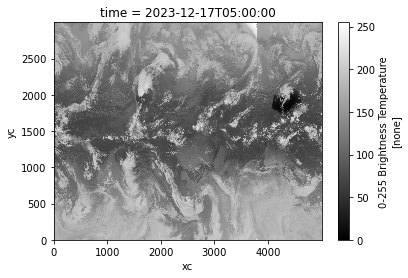

In [8]:
ds.data[0].plot(cmap="gray")